# Objetivo de la practica
Un problema común en los algoritmos de aprendizaje automático es su tendencia a "memorizar" los datos con los que han sido entrenados. En términos de ciencia de datos, esto se denomina __sobreajuste de los datos__ y puede hacer que el modelo se vea muy bien en los datos de entrenamiento, pero en realidad no tiene la capacidad de generalizar sobre los nuevos datos que se proporcionan. 

Para obtener una perspectiva de cómo está funcionando realmente el modelo, usamos una __división de train/test__. En pocas palabras, solo seleccionamos un cierto porcentaje de nuestros datos y los retenemos de los "ojos" del algoritmo de aprendizaje automático. De esta manera, al final del entrenamiento, todavía hay una gran cantidad de datos en los que podemos probar el modelo y ver cómo funciona en comparación con los datos de entrenamiento. A menudo, cuando comparamos la puntuación de la prueba y los datos de entrenamiento, los datos de entrenamiento tendrán una puntuación más baja, pero en buenos modelos, la puntuación de la prueba debe estar cerca.

Probemos esto rápidamente con el clasificador de regresión logística de Scikit-Learn.
Primero importemos el modelo train_test_split de la biblioteca Scikit. Luego asignamos las "características" o columnas que queremos usar para la predicción a "x" y nuestras "etiquetas" o columnas que estamos prediciendo a "y". A continuación, usamos x e y como nuestros datos para la función train_test_split y también especificamos el tamaño de prueba que queremos. Además, podemos asignar un estado_aleatorio que es opcional y no afecta la calidad de nuestros datos.

# Carga del dataset (csv cleaned_train.csv)
Disponemos de un único csv de datos (cleaned_train.csv)

In [1]:
import pandas as pd
titanic_cleaned = pd.read_csv(r"cleaned_train.csv",sep=',')
titanic_cleaned.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
5,0,3,1,24.0,0,0,8.4583,3
6,0,1,1,54.0,0,0,51.8625,1
7,0,3,1,2.0,3,1,21.0750,1
8,1,3,0,27.0,0,2,11.1333,1
9,1,2,0,14.0,1,0,30.0708,2


In [2]:
from sklearn.model_selection import train_test_split

x = titanic_cleaned[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = titanic_cleaned["Survived"]
print("Dataset titanic cargado. Número de registros: {}".format(x.shape[0]))

# Dividimos en un 20% para test y 80% para train
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state=20)
print("Hay {} registros en el set de train y {} registros en el set de test".format(
X_train.shape[0], X_test.shape[0]))

Dataset titanic cargado. Número de registros: 889
Hay 711 registros en el set de train y 178 registros en el set de test


A continuación, conectamos nuestros datos limpios y divididos en nuestro algoritmo de regresión logística, que tenemos que importar. Primero entrenamos o "ajustamos" nuestro modelo en la división de entrenamiento. Luego, para obtener una puntuación adecuada del modelo, la puntuamos según los datos de la prueba. También puede puntuar el modelo en los datos de entrenamiento, lo que nos puede dar una idea de los puntos perdidos entre el entrenamiento y las ejecuciones de prueba. Esto puede proporcionar pistas sobre cuánto está sobreajustado el modelo. Lo ideal es que estas cifras esten muy cerca.

In [3]:
from sklearn.linear_model import LogisticRegression

# Definimos el modelo, en este caso un modelo muy basico de regresión logisitca
regression = LogisticRegression(max_iter = 1000)

# Entrenamos el modelo
regression.fit(X_train, y_train)

train_score = round(regression.score(X_train, y_train),4)
test_score = round(regression.score(X_test, y_test),4)
print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)

Train Accuracy: 0.8087
Test Accuracy: 0.7978


Como puedes ver en la siguiente tabla, __las puntuaciones están muy cerca, lo que indica que evitamos un ajuste excesivo__. Debo mencionar que esta es una buena indicación de que no hemos sobreajustado el modelo, sin embargo, no es el final del todo. A continuación, analizaremos otro método para evitar el ajuste excesivo de nuestros datos y, con suerte, mejorar nuestra capacidad para generalizar sobre nuevos datos.

In [4]:
tabla = pd.DataFrame({
        "Data": ["Train Accuracy", "Test Accuracy"],
        "Nº rows": [X_train.shape[0], X_test.shape[0]],
        "Score": [train_score, test_score]
    })
tabla

,Data,Nº rows,Score
0,Train Accuracy,711,0.8087
1,Test Accuracy,178,0.7978


# Usemos cross-validation (validación cruzada)
Además de una división de train/test, la validación cruzada puede ser muy útil para comprender la calidad de las predicciones de su modelo. __Oculto en cada conjunto de datos hay una cantidad inherente de sesgo__ hacia un determinado resultado de predicción. Una forma de pensarlo es que cuando selecciona una cierta cantidad de puntos para entrenar su modelo, estadísticamente hablando, nunca muestreará sus datos de manera que sea perfectamente "justo" para cada resultado. De esta manera, __está incluyendo__ efectivamente __un sesgo para predecir ciertas clases con más frecuencia que otras__. Como ya habrás adivinado, la validación cruzada puede ayudar a combatir esto e informarnos sobre el verdadero estado de nuestro modelo.

Utilizaremos específicamente el método Kfold de la biblioteca Scikit-Learn. Lo que hace la __validación cruzada de Kfold__ es cambiar los datos en los que estamos probando y entrenando. La siguiente tabla muestra una visualización de cómo funciona esto. Cuando usamos Kfold en su modelo, lo esencial es dividir sus datos en un número “K” de pliegues o segmentos, la figura siguiente muestra __K = 4__ . Una sección se usa para pruebas mientras que el resto de los segmentos se usan para entrenamiento. Luego calcula una puntuación por cada vez que se entrena y se prueba el modelo. Esto se hace para que cada segmento se pruebe exactamente una vez. Lo que esto permite es una estimación real de cómo se está desempeñando realmente el modelo, de esta manera podemos eliminar una gran cantidad de sesgos (no todos) de la puntuación de la prueba, ya que se ha entrenado con todos los datos a lo largo de las pruebas.

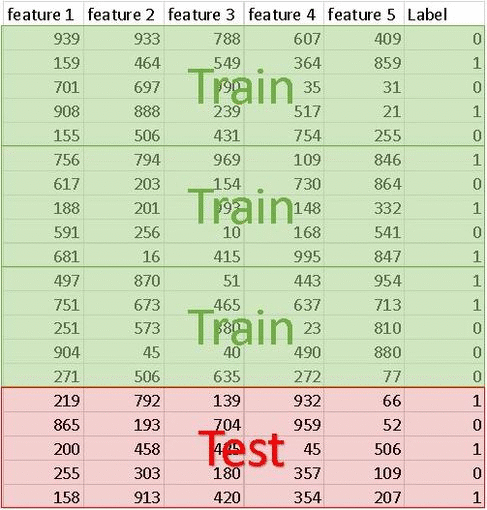

In [5]:
# Imports
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

random_seed = 1 # Semilla para los aleatorios
splits = 5 # Número de cortes, segmentos o splits para KFolds
kf = KFold(n_splits=splits, random_state=random_seed, shuffle=True)

# Definimos el modelo, en este caso un modelo muy basico de regresión logisitca
model = LogisticRegression(max_iter = 1000)

# Proceso de cross-validation
scores = cross_val_score(model, X_train, y_train, cv=kf)

# Mostramos la puntuación promedio sobre los 5 splits
print("Metricas accuracy cross_validation:", scores)
print("Promedio cross_validation: {0:.3f}%".format(scores.mean()*100))

Metricas accuracy cross_validation: [0.79020979 0.77464789 0.77464789 0.85211268 0.84507042]
Promedio cross_validation: 80.734%


# Escoger modelo
Ahora que tenemos nuestra división de datos y conocemos una forma básica de probar nuestro modelo con Kfolds y en el conjunto de prueba, necesitamos averiguar por dónde empezar para encontrar el mejor modelo para nuestra aplicación. Hay muchas formas de hacerlo, sin embargo, un primer intento bastante simple y bueno es __entrenar algunos modelos diferentes con los mismos datos__ y ver qué puntaje obtienen cada uno de ellos "fuera de la caja". Como veremos más adelante, podemos tomar los dos modelos con mejor rendimiento y ajustarlos individualmente para obtener resultados aún mejores. Para calificar cada uno de los modelos, usaremos un indicador llamado __área bajo la curva (area under the curve - AUC)__ que se discutirá más adelante. 

El siguiente código muestra cada uno de los modelos que utilicé en este ejemplo. Si es nuevo en ML, no es importante todavía entender cómo funciona el modelo bajo el capó, pero lo más importante es entender cómo puntúan inicialmente. Esto nos permitirá tomar una decisión de la cantidad de modelos que queremos usar, por ahora __elegiremos los 2 primeros__. A continuación se muestran los resultados de 5 modelos diferentes de Scikit-learn.

#### Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model1 = LogisticRegression(max_iter = 1000)
cross_val = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(model1, X_train, y_train, cv=cross_val, scoring='roc_auc')
scores_mean_lr = scores.mean()
print("Mean AUC Score - Logistic Regression: ", scores_mean_lr)

# Entrenamos el modelo
model1.fit(X_train, y_train)

# Comprobamos las metricas tras el entrenamiento
print("Train Accuracy: {:.3f}".format(model1.score(X_train, y_train)))

Mean AUC Score - Logistic Regression:  0.8580168568252802
Train Accuracy: 0.809


#### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
kfold = KFold(n_splits=3, random_state=42, shuffle=True) 
scores = cross_val_score(model2, X_train, y_train, cv=kfold, scoring='roc_auc')
scores_mean_rf = scores.mean()
print("Mean AUC Score - Random Forest: ", scores_mean_rf)

# Entrenamos el modelo
model2.fit(X_train, y_train)

# Comprobamos las metricas tras el entrenamiento
print("Train Accuracy: {:.3f}".format(model2.score(X_train, y_train)))

Mean AUC Score - Random Forest:  0.8667239882886627
Train Accuracy: 0.989


#### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
cross_val = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(model3, X_train, y_train, cv=cross_val, scoring='roc_auc')
scores_mean_dt = scores.mean()
print("Mean AUC Score - Decision Tree: ", scores_mean_dt)

# Entrenamos el modelo
model3.fit(X_train, y_train)

# Comprobamos las metricas tras el entrenamiento
print("Train Accuracy: {:.3f}".format(model3.score(X_train, y_train)))

Mean AUC Score - Decision Tree:  0.7539634554012379
Train Accuracy: 0.989


#### Gaussian  Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB
model4 = GaussianNB()
cross_val = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(model4, X_train, y_train, cv=cross_val, scoring='roc_auc')
scores_mean_gnb = scores.mean()
print("Mean AUC Score - Gaussian Naive Bayes: ", scores_mean_gnb)

# Entrenamos el modelo
model4.fit(X_train, y_train)

# Comprobamos las metricas tras el entrenamiento
print("Train Accuracy: {:.3f}".format(model4.score(X_train, y_train)))

Mean AUC Score - Gaussian Naive Bayes:  0.8282149804468345
Train Accuracy: 0.789


#### K-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
cross_val = KFold(n_splits=3, random_state=42, shuffle=True)
scores = cross_val_score(model5, X_train, y_train, cv=cross_val, scoring='roc_auc')
scores_mean_knn = scores.mean()
print("Mean AUC Score - K-Nearest Neighbors: ", scores_mean_knn)

# Entrenamos el modelo
model5.fit(X_train, y_train)

# Comprobamos las metricas tras el entrenamiento
print("Train Accuracy: {:.3f}".format(model5.score(X_train, y_train)))

Mean AUC Score - K-Nearest Neighbors:  0.7150632980278648
Train Accuracy: 0.792


### Evaluación del modelo

Ahora podemos clasificar nuestra evaluación de todos los modelos para elegir el mejor para nuestro problema. 

In [11]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Random Forest', 'Gaussian Naive Bayes', 'Decision Tree'],
    'Score': [scores_mean_knn, scores_mean_lr, scores_mean_rf, scores_mean_gnb, scores_mean_dt]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,0.866724
1,Logistic Regression,0.858017
3,Gaussian Naive Bayes,0.828215
4,Decision Tree,0.760683
0,KNN,0.715063


### Resultados

Nos quedamos con Random Forest y con Logistic Regression

### Guardar el modelo gracias al módulo pickle
Es importante que guardemos el modelo para no tener que pasar por todo el proceso de entrenamiento y ajuste cada vez que se quiera ejecutar este proyecto

In [15]:
import pickle

pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model2, file) # model2 es el modelo RandomForest que queremos guardar

#### Podemos usar Pandas para ver información del modelo comprimido en pkl

In [16]:
unpickled_model = pd.read_pickle("./pickle_model.pkl")
unpickled_model

RandomForestClassifier()

### Carguemos el modelo gracias al módulo pickle
Supongamos que cerramos Anaconda o que realizamos otro programa donde queramos usar este modelo que hemos definido y entrenado. Lo que haremos será simplemente cargarlo y usarlo:

In [17]:
import pickle

pkl_filename = "pickle_model.pkl"

with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

# Comprobamos las metricas tras el entrenamiento
print("Train Accuracy: {:.3f}".format(pickle_model.score(X_train, y_train)))

Ypredict = pickle_model.predict(X_test)
print("Predicción: ", Ypredict)

Train Accuracy: 0.989
Predicción:  [1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0
 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0]


### Conclusión
Aquí es donde obtenemos nuestra métrica de puntuación final, hemos usado la curva (ROC-AUC). El AUC es básicamente el cálculo del área bajo el ROC, de esta manera cuantificamos qué tan bien lo hace el modelo en un rango de valores de umbral. __Cuanto más área tengamos debajo de la curva, mejor fue el modelo en la predicción de clases__ y, por lo tanto, tenemos una __mayor tasa de verdaderos positivos__ mientras que la cantidad de falsos positivos se mantiene en una tasa mucho más baja. 

La gran conclusión aquí es que __una puntuación AUC más alta generalmente corresponderá a un mejor modelo__.

Debe tenerse en cuenta que si bien estamos tratando de llegar a una tasa de verdaderos positivos del 100% sin tener falsos positivos, podemos cambiar a veces y tolerar una tasa de falsos positivos más alta para lograr una tasa de verdaderos positivos más alta. Esta decisión debe tomarse con la predicción final en mente, si es una predicción de vida o muerte, esta no es una buena idea, pero si predice el estado de ánimo de un usuario de Facebook, puede tolerar más falsos positivos.